In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
from random import randint

import cv2
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers

from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = './Simpsons/train/'
test_dir = './Simpsons/val/'

In [20]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
batch_size = 8

In [6]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(128, 128))

Found 435 images belonging to 10 classes.


In [7]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                         directory=test_dir,
                                                         shuffle=True,
                                                         target_size=(128, 128))

Found 100 images belonging to 10 classes.


In [8]:
sample_batch = next(train_data_gen)
sample_batch[0].shape

(8, 128, 128, 3)

In [36]:
model = tf.keras.models.Sequential([

    layers.Conv2D(16, (3, 3), padding='same', activation='relu', 
                  input_shape=sample_batch[0].shape[1:]),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compile model

In [37]:
model.compile(optimizer='adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 128)      

### Training model

In [39]:
training_hist = model.fit(train_data_gen,
                               epochs=40,
                               steps_per_epoch=435//batch_size,
                               validation_data=test_data_gen,
                               validation_steps=100//batch_size)

Epoch 1/40
54/54 [==============================] - 4s 68ms/step - loss: 3.3013 - accuracy: 0.1047 - val_loss: 2.1654 - val_accuracy: 0.1250
Epoch 2/40
54/54 [==============================] - 4s 68ms/step - loss: 1.7357 - accuracy: 0.3540 - val_loss: 1.1956 - val_accuracy: 0.6354
Epoch 3/40
54/54 [==============================] - 4s 64ms/step - loss: 0.8825 - accuracy: 0.7370 - val_loss: 0.5385 - val_accuracy: 0.8333
Epoch 4/40
54/54 [==============================] - 4s 70ms/step - loss: 0.3451 - accuracy: 0.8957 - val_loss: 0.7585 - val_accuracy: 0.8125
Epoch 5/40
54/54 [==============================] - 4s 73ms/step - loss: 0.1931 - accuracy: 0.9372 - val_loss: 0.8613 - val_accuracy: 0.8333
Epoch 6/40
54/54 [==============================] - 3s 59ms/step - loss: 0.2684 - accuracy: 0.9489 - val_loss: 0.8458 - val_accuracy: 0.8438
Epoch 7/40
54/54 [==============================] - 3s 59ms/step - loss: 0.1111 - accuracy: 0.9666 - val_loss: 0.5383 - val_accuracy: 0.8958
Epoch 8/40
54

### Plotting accuracy and loss with epoch both for training and validation

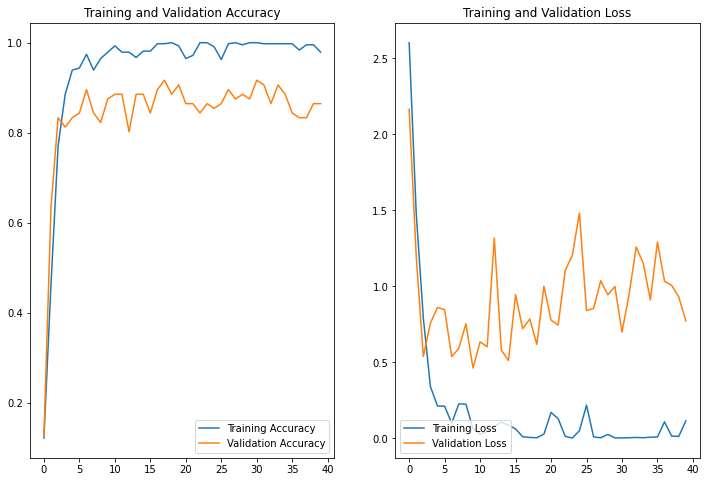

In [40]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']

loss = training_hist.history['loss']
val_loss = training_hist.history['val_loss']

epochs_range = range(40)

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')

plt.legend(loc='lower left')

plt.title('Training and Validation Loss')
plt.show()

In [64]:
lookup = [
    'Bart-Simpson',
    'Chief-Wiggum',
    'Dr-Hibbert',
    'Homer-Simpsons',
    'Krusty-the-Clown',
    'Lisa-Simpson',
    'Marge-Simpsons',
    'Milhouse-van-Houten',
    'Mr-Burns',
    'Ned-Flanders'
]

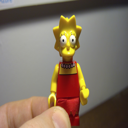

In [63]:
import PIL
from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/hnky/dataset-lego-figures/master/_test/Lisa.jpg'
response = requests.get(url)
image = PIL.Image.open(BytesIO(response.content)).resize([128,128])
image

In [65]:
input_array = np.array(image, dtype=np.float32)[np.newaxis, :, :, :]
outputs = model.predict(input_array.astype(np.float32))
print('Predicted label: ', lookup[np.argmax(outputs)])

Predicted label:  Lisa-Simpson


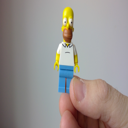

In [68]:
url = 'https://raw.githubusercontent.com/hnky/dataset-lego-figures/master/_test/Homer.jpg'
response = requests.get(url)
image = PIL.Image.open(BytesIO(response.content)).resize([128,128])
image

In [69]:
input_array = np.array(image, dtype=np.float32)[np.newaxis, :, :, :]
#input_array = input_array.transpose((0, 3, 1, 2))[:, (2, 1, 0), :, :]
outputs = model.predict(input_array.astype(np.float32))
print('Predicted label: ', lookup[np.argmax(outputs)])

Predicted label:  Homer-Simpsons
